<h1 align="center">🏠 House Price Regression</h1>


### 🧠 House Price Regression

#### 📌 Problem  
In the real estate industry, accurately **estimating house prices** is a major challenge. Buyers, sellers, and investors often lack reliable tools to **assess the true value of a property** based on its features (e.g., square footage, number of rooms, location). This can lead to poorly informed financial decisions.

- **install usefull librairies**

In [1]:

import matplotlib.pyplot as plt
%matplotlib inline
import morethemes as mt
import pandas as pd
mt.set_theme("ft")
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

- **Load the dataset**

In [2]:
data = pd.read_csv("house_price_regression_dataset.csv")
print(data.shape)
data.head()

(1000, 8)


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [4]:
duplicates = data[data.duplicated()]# Check for duplicates in the 'data' DataFrame
data = data.drop_duplicates()# Remove duplicates from data
data.shape

(1000, 8)

In [23]:
data["price per square foot"] = data["House_Price"] /data["Square_Footage"]
data.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,price per square foot
0,1360,2,1,1981,0.599637,0,5,2.623829e+05,192.928568
1,4272,3,3,2016,4.753014,1,6,9.852609e+05,230.632222
2,3592,1,2,2016,3.634823,0,9,7.779774e+05,216.586133
3,966,1,2,1977,2.730667,1,8,2.296989e+05,237.783560
4,4926,2,1,1993,4.699073,0,8,1.041741e+06,211.478047


In [5]:
data = data.select_dtypes(exclude=['object'])
data.drop(columns=data.select_dtypes(include=['object']).columns, inplace=True)

In [6]:
data.shape

(1000, 8)

In [7]:
data.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


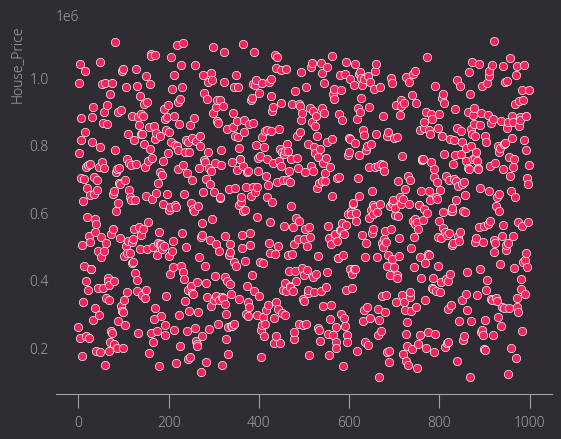

In [8]:
sns.scatterplot(data["House_Price"])
plt.show()

In [ ]:
# Checked and removed redundant variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

selected_features = data.select_dtypes(include='number').columns.tolist()
selected_features.remove("House_Price")
X = add_constant(data[selected_features])
vif_data = pd.DataFrame()

vif_data["House_Price"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


             House_Price           VIF
0                  const  11385.909513
1         Square_Footage      2.064302
2           Num_Bedrooms      1.228727
3          Num_Bathrooms      1.037536
4             Year_Built      1.373421
5               Lot_Size      1.311267
6            Garage_Size      1.034699
7   Neighborhood_Quality      1.004506
8  price per square foot      2.915408


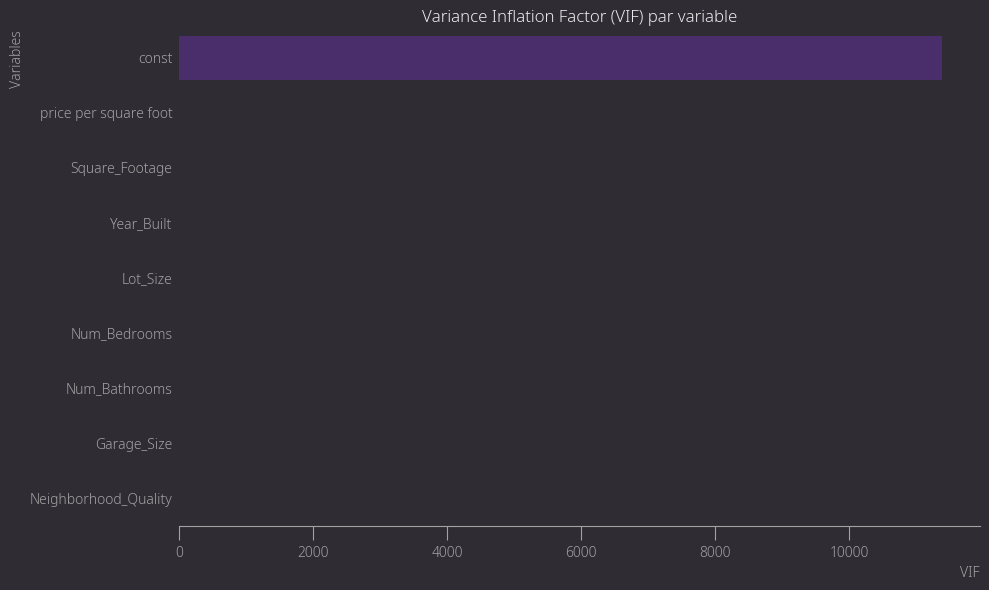

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


vif_data["Feature"] = X.columns 
vif_data = vif_data.sort_values(by="VIF", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=vif_data, x="VIF", y="Feature", palette="viridis")
plt.title("Variance Inflation Factor (VIF) par variable")
plt.xlabel("VIF")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()


In [31]:
data.isnull().sum()

Square_Footage           0
Num_Bedrooms             0
Num_Bathrooms            0
Year_Built               0
Lot_Size                 0
Garage_Size              0
Neighborhood_Quality     0
House_Price              0
price per square foot    0
dtype: int64

In [32]:
corr = data.corr()
corr

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,price per square foot
Square_Footage,1.000000,-0.043564,-0.031584,-0.022392,0.089479,0.030593,-0.008357,0.991261,-0.592477
Num_Bedrooms,-0.043564,1.000000,0.022848,-0.015820,-0.009355,0.113761,-0.049024,0.014633,0.298136
Num_Bathrooms,-0.031584,0.022848,1.000000,-0.021063,0.034923,0.024846,0.017585,-0.001862,0.137741
Year_Built,-0.022392,-0.015820,-0.021063,1.000000,-0.061050,-0.025485,-0.009549,0.051967,0.340809
Lot_Size,0.089479,-0.009355,0.034923,-0.061050,1.000000,0.002436,0.037630,0.160412,0.244831
Garage_Size,0.030593,0.113761,0.024846,-0.025485,0.002436,1.000000,-0.011287,0.052133,0.087725
Neighborhood_Quality,-0.008357,-0.049024,0.017585,-0.009549,0.037630,-0.011287,1.000000,-0.007770,-0.005043
House_Price,0.991261,0.014633,-0.001862,0.051967,0.160412,0.052133,-0.007770,1.000000,-0.511148
price per square foot,-0.592477,0.298136,0.137741,0.340809,0.244831,0.087725,-0.005043,-0.511148,1.000000


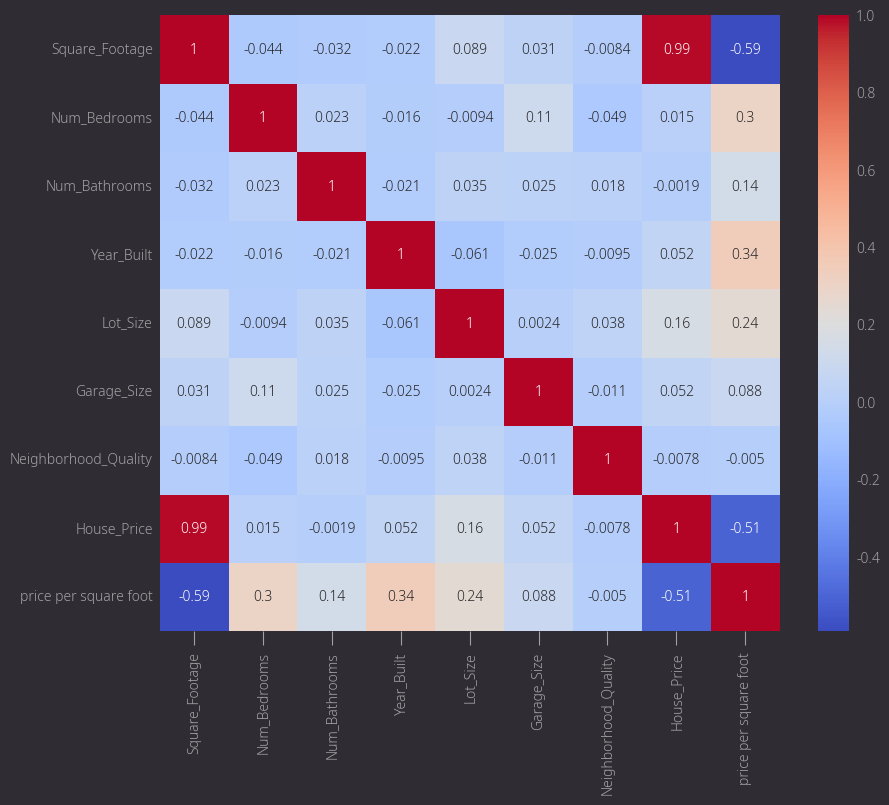

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


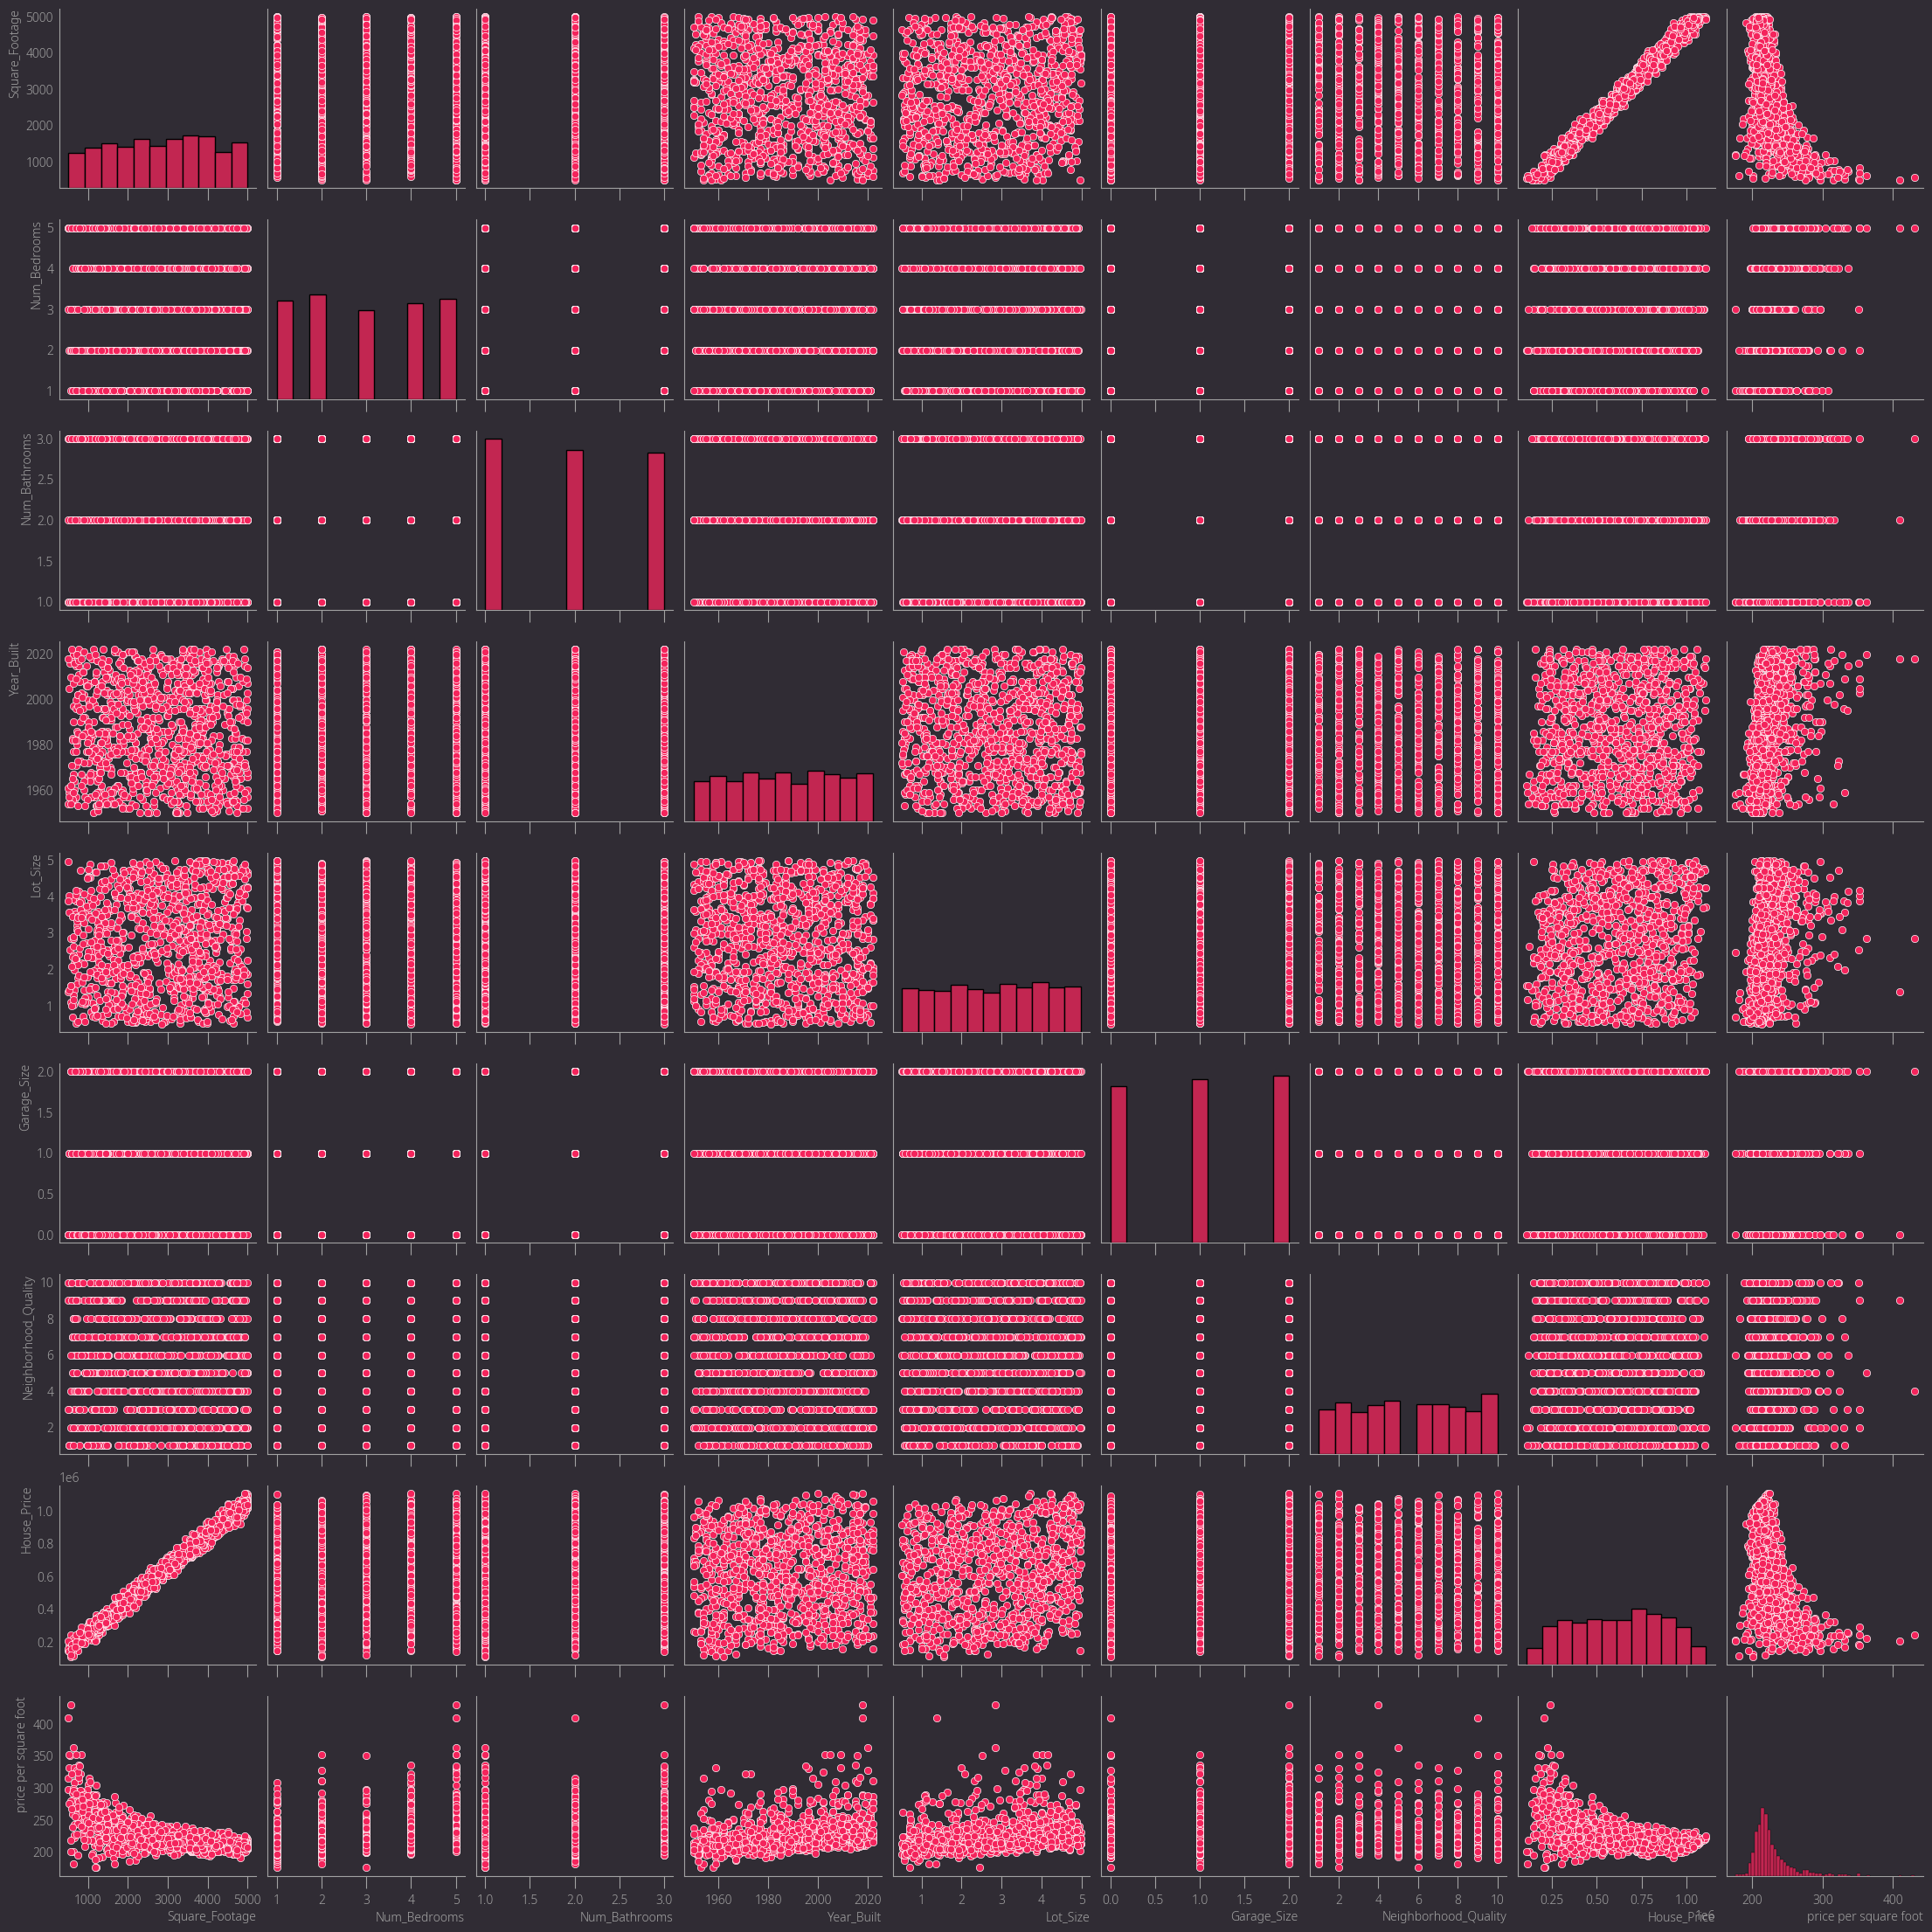

In [34]:
sns.pairplot(data)
plt.show()

In [35]:
data.columns

Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price',
       'price per square foot'],
      dtype='object')

In [36]:
X = data.drop(columns=["House_Price"])
y = data["House_Price"]

In [37]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [38]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Exemple : X = features, y = target
model = RandomForestRegressor()
model.fit(X, y)


RandomForestRegressor()

In [39]:
pred = model.predict(X_test)

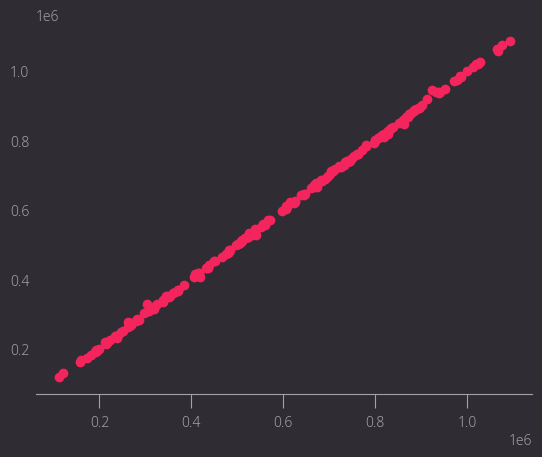

In [40]:
plt.scatter(y_test,pred)
plt.show()

In [42]:

# Importance des features
importances = model.feature_importances_
feature_scores = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("The most important feature is :",feature_scores.index[0],"with ",feature_scores.head(10)[0])


The most important feature is : Square_Footage with  0.9860675724694852


In [43]:
from sklearn import metrics

In [44]:
mae = metrics.mean_absolute_error(y_test,pred)
rmse = metrics.root_mean_squared_error(y_test,pred)
mse = metrics.mean_squared_error(y_test,pred)
print("mean square error is : ",mae)
print("\nrout mean square error is : ",rmse)
print("\nmean absolute error is : ",mse)

mean square error is :  2838.9023957460863

rout mean square error is :  4363.9219322084455

mean absolute error is :  19043814.630409893


#### ✅ Solution  
This project builds a **supervised regression model** to **predict house prices** using historical data. By applying machine learning algorithms called **RandomForestRegressor** , the model learns the relationships between property features and their prices. **Interactive visualizations** support better understanding and allow users to explore key factors driving price predictions, enabling **data-driven real estate decisions**.

### 🔍 Project Methodologies

- **Data Cleaning & Preprocessing**  
  Handled missing values, converted categorical features using one-hot encoding, and normalized numerical features for optimal model performance.

- **Exploratory Data Analysis (EDA)**  
  Used visualizations (histograms, boxplots, heatmaps) to understand distributions, detect outliers, and analyze correlations between features and house prices.

- **Feature Engineering**  
  Created new features (price per square foot), removed redundant variables with VIF(variance inflation factor), and selected the most relevant features based on correlation and domain knowledge.

- **Modeling**  
  Trained and evaluated several regression algorithms including:
  - Random Forest Regressor  

- **Evaluation Metrics**  
  Compared model performance using:
  - Root Mean Squared Error (RMSE)  
  - Mean Absolute Error (MAE)  
  - R-squared (R²)

- **Visualization of Predictions**  
  Plotted predicted vs. actual prices and residuals to assess model accuracy and detect under/overfitting.

